In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [395]:
df = pd.read_csv(r'insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [396]:
print(df.columns[0])

age


In [397]:
#isolating datasets
sex = df.loc[:,'sex']
no_children = df.loc[:,'children']
charges = df.loc[:,'charges']

In [398]:
#summary of datasets
print(sex.head())
print(no_children.head())
print(charges.head())

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object
0    0
1    1
2    3
3    0
4    0
Name: children, dtype: int64
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [399]:
#count for each sex
f_count = 0
m_count = 0
for person in sex:
    if person == 'female':
        f_count += 1
    if person == 'male':
        m_count += 1

In [400]:
print("Females: " + str(f_count))
print("Males: " + str(m_count))

Females: 662
Males: 676


In [401]:
#zipping isolated datasets together, then will organize by sex
f_data = []
m_data = []

total_data = list(zip(sex, no_children, charges))

In [402]:
#populating female and male datasets
for person in total_data:
    if person[0] == 'female':
        f_data.append(person)
    else:
        m_data.append(person)
    

In [403]:
#sanity check
print(len(f_data))
print(len(m_data))

662
676


In [404]:
#Scatter Plots

Text(0.5, 1.0, 'No. Of Children vs Medical Charges for Females')

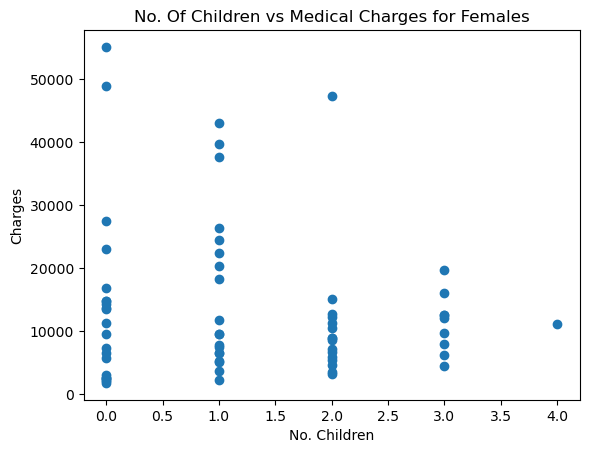

In [405]:
f_no_children = []
f_charges = []

for index, person in enumerate(f_data):
    if index % 10 == 0:
        f_no_children.append(person[1])
        f_charges.append(person[2])

plt.scatter(f_no_children, f_charges)

plt.xlabel('No. Children')
plt.ylabel('Charges')
  
# giving a title to my graph
plt.title('No. Of Children vs Medical Charges for Females')

Text(0.5, 1.0, 'No. Of Children vs Medical Charges for Males')

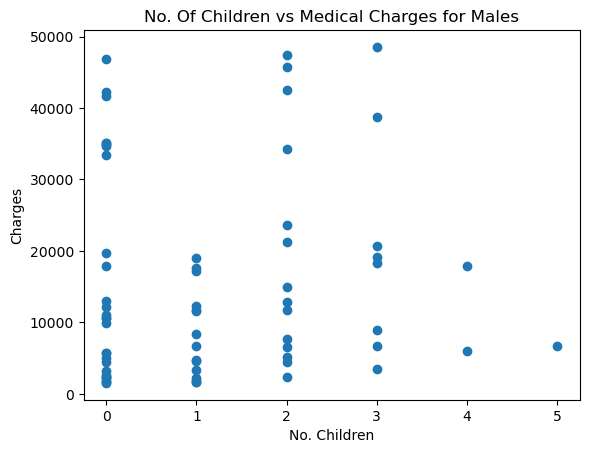

In [406]:
m_no_children = []
m_charges = []

for index, person in enumerate(m_data):
    if index % 10 == 0:
        m_no_children.append(person[1])
        m_charges.append(person[2])

plt.scatter(m_no_children, m_charges)

plt.xlabel('No. Children')
plt.ylabel('Charges')
  
# giving a title to my graph
plt.title('No. Of Children vs Medical Charges for Males')

Text(0.5, 1.0, 'No. Of Children vs Medical Charges for Females')

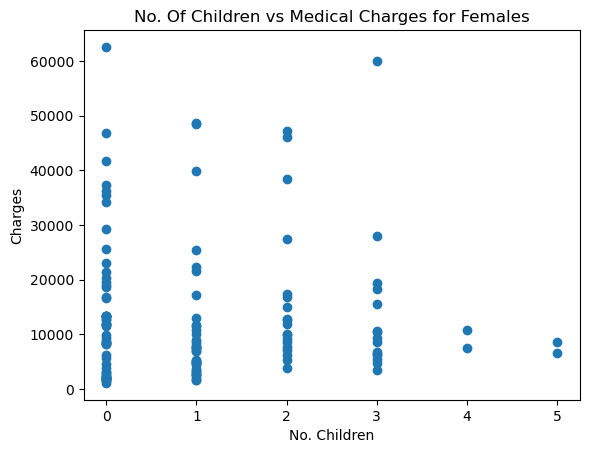

In [407]:
total_no_children = []
total_charges = []

for index, person in enumerate(total_data):
    if index % 10 == 0:
        total_no_children.append(person[1])
        total_charges.append(person[2])

plt.scatter(total_no_children, total_charges)

plt.xlabel('No. Children')
plt.ylabel('Charges')
  
# giving a title to my graph
plt.title('No. Of Children vs Medical Charges for Females')

In [408]:
#Linear Regression

In [409]:
#females
f_x = np.array(f_no_children).reshape((-1, 1))
f_y = np.array(f_charges)
f_model = LinearRegression()
f_model.fit(f_x, f_y)
f_r_sq = f_model.score(f_x, f_y)
print(f"coefficient of determination: {f_r_sq}")
print(f"intercept: {f_model.intercept_}")

print(f"slope: {f_model.coef_}")

coefficient of determination: 0.011151374031309946
intercept: 14686.562553853073
slope: [-1149.46909998]


In [410]:
#males
m_x = np.array(m_no_children).reshape((-1, 1))
m_y = np.array(m_charges)
m_model = LinearRegression()
m_model.fit(m_x, m_y)
m_r_sq = model.score(m_x, m_y)
print(f"coefficient of determination: {m_r_sq}")
print(f"intercept: {m_model.intercept_}")

print(f"slope: {m_model.coef_}")

coefficient of determination: 0.004099707180118539
intercept: 14570.745561222222
slope: [717.85093046]


In [411]:
#linear regression plot for females
f_y_pred = model.predict(f_x)

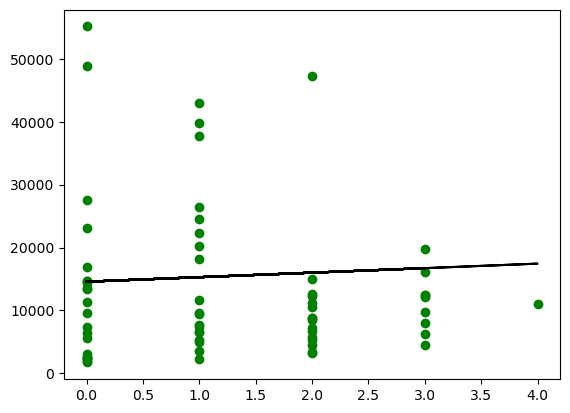

In [418]:
plt.scatter(f_x, f_y,color='g') 

plt.plot(f_x, f_y_pred,color='k') 
plt.show()

In [419]:
#linear regression plot for females
m_y_pred = model.predict(m_x)

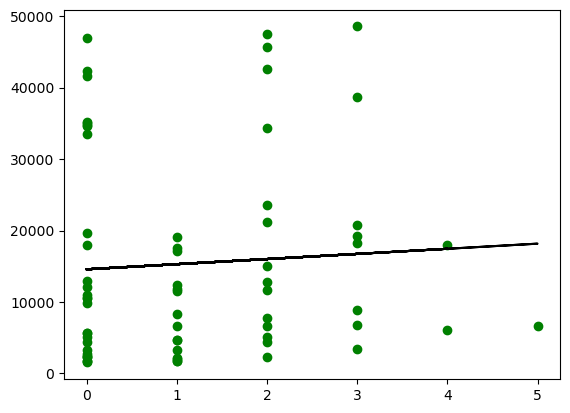

In [420]:
plt.scatter(m_x, m_y,color='g') 

plt.plot(m_x, m_y_pred,color='k') 
plt.show()

In [415]:
#There is little to no coorelation of charges and no. of children for females and even less for males